### toy project by Campus X

In [184]:
import pandas as pd 
import numpy as np 

In [185]:
df = pd.read_csv('./dataset/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [187]:
df = df.iloc[:, 1:]

In [188]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### **Steps**
1. Preprocessing + EDA + Feature Selection
2. Extract input and output columns
3. Scale the values
4. Train the model
5. Evaluate the model
6. Deploy the model


In [189]:
import matplotlib.pyplot as plt 
%matplotlib inline

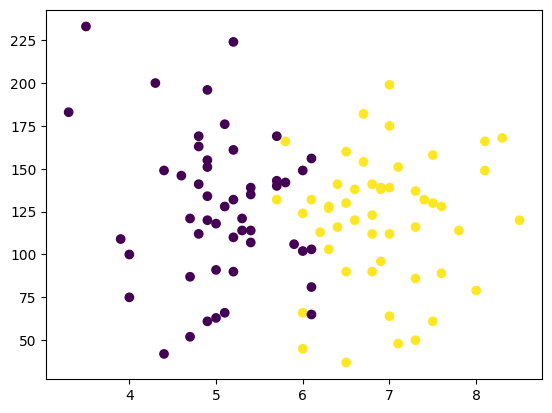

In [190]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.show()

In [191]:
# split cgpa and iq column into X and placemnt column into y
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [192]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [193]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [194]:
# Scale the values 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [195]:
X_train

array([[-0.93082323, -0.07305949],
       [-0.24415035,  0.24130006],
       [-0.24415035,  0.45087309],
       [ 0.01335197,  0.03172703],
       [-1.10249144, -0.93754823],
       [ 0.70002484, -0.85895835],
       [ 1.81586826,  1.13198543],
       [-0.84498912, -0.12545274],
       [ 0.52835663,  0.39847983],
       [ 1.12919539,  0.3722832 ],
       [-0.50165268,  0.42467646],
       [ 0.2708543 ,  0.13651354],
       [ 1.30086361,  0.9224124 ],
       [-0.58748679, -0.23023926],
       [ 0.44252252,  0.1889068 ],
       [-1.35999377, -2.11639652],
       [ 0.61419073,  1.55113149],
       [-1.01665733,  0.47706972],
       [ 0.01335197, -0.5445988 ],
       [ 0.09918608, -1.09472801],
       [ 1.2150295 ,  0.24130006],
       [ 0.87169306,  0.42467646],
       [-1.10249144, -0.04686286],
       [ 0.95752717,  0.739036  ],
       [ 0.70002484, -0.28263252],
       [ 0.87169306, -0.28263252],
       [-0.93082323,  0.84382252],
       [-0.15831625,  0.50326634],
       [ 0.87169306,

In [196]:
X_test

array([[-0.99587343,  0.59139432],
       [-0.99587343,  1.82102607],
       [-0.76155027, -0.46257575],
       [ 0.29290395, -0.54064761],
       [ 1.8160045 , -0.81389911],
       [-0.05858079,  0.35717875],
       [ 1.11303502,  1.33307696],
       [-1.34735818,  0.06440928],
       [-0.05858079, -1.67268954],
       [ 0.99587343, -0.67727336]])

In [197]:
# Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [198]:
y_pred = model.predict(X_test)

In [199]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [200]:
y_test

47    0
16    0
81    0
98    1
42    1
33    0
26    1
40    0
10    1
66    1
Name: placement, dtype: int64

In [201]:
# evaluation the model
from sklearn.metrics import mean_squared_error, r2_score
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  0.1
R2:  0.6


In [202]:
from sklearn.metrics import accuracy_score

In [203]:
accuracy_score(y_test, y_pred)

0.9

In [204]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

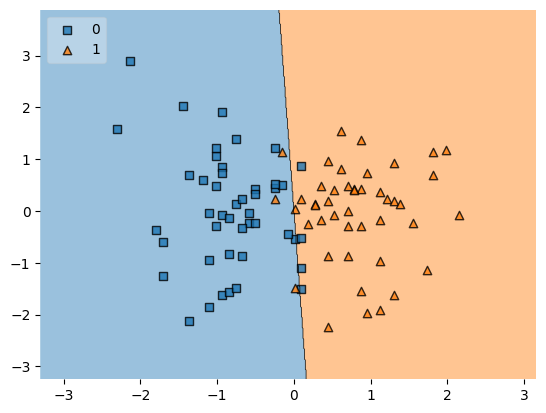

In [205]:
plot_decision_regions(X_train, y_train.values, clf=model, legend=2)

In [206]:
import pickle 

In [207]:
pickle.dump(model, open('model01.pkl', 'wb'))